In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import random
import time
IMG_SIZE = 50

# CATEGORIES = None
DATADIR = os.getcwd() + "\\UTKFace"
print(DATADIR)

fileAmount = len([f for f in os.listdir(DATADIR)if os.path.isfile(os.path.join(DATADIR, f))])

# Print iterations progress
def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()


# bar = ''
# count = 50

# fill = count * '-'

# barIncrement = 100/count

# # 50
# # every 2 % equals a bar
# for x in range(fileAmount + 1):
#     # print("{:.2f}".format((x/20000)* 100))
#     percent = "{:.3f}".format((x/fileAmount) * 100)
#     # print(percent)
#     if(float(percent) % barIncrement == 0):
#         bar += '█' * 
#         count -= 1
#         updatedfill = fill[0:count]
#         time.sleep(0.1)
#         print(f'\r|{bar}{updatedfill}|{percent}{count}', end = "\r")

#         # fill gets reset to fill = 50 * '-' when this is over


c:\Users\Admin\Documents\Python\TensorFlow\Keras\Ethnicity Detection\UTKFace


highest amount at  16   200
lowest amount at  11   65
{'10': 156, '11': 65, '12': 130, '13': 81, '14': 157, '15': 177, '16': 200, '17': 158, '18': 200, '19': 98, '20': 200, '21': 200, '22': 200, '23': 200, '24': 200, '25': 200, '26': 200, '27': 200, '28': 200, '29': 200, '30': 200, '31': 200, '32': 200, '33': 143, '34': 200, '35': 200, '36': 200, '37': 200, '38': 200, '39': 200, '40': 200, '41': 132, '42': 200, '43': 157, '44': 100, '45': 200, '46': 153, '47': 170, '48': 153, '49': 148, '50': 200, '51': 138, '52': 200, '53': 200, '54': 200, '55': 200, '56': 200, '57': 97, '58': 200, '59': 82, '60': 200, '61': 161, '62': 125, '63': 103}
9284


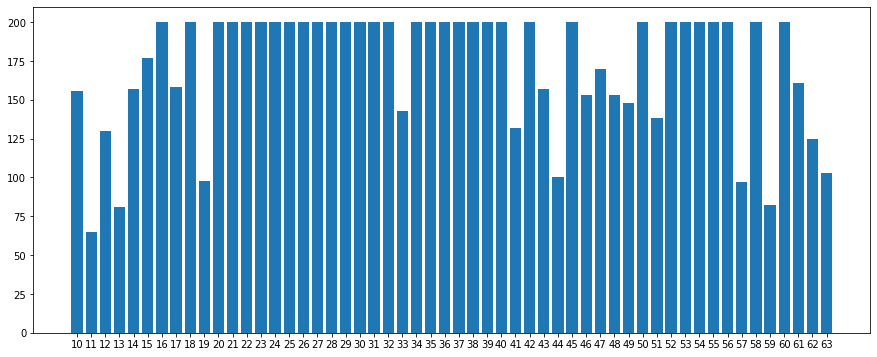

In [8]:
agearr = []
agedict = {}
training_data_age = []

def create_training_data_age():
    printProgressBar(0, fileAmount, prefix = 'Progress:', suffix = 'Complete', length = 50)
    count = 0
    # list all files in directory
    for iteration,img in enumerate(os.listdir(DATADIR)):
        # split each directory witl delimator of _ 
        age, gender, race, _ = img.split('_')
        printProgressBar(iteration, fileAmount, prefix = 'Progress:', suffix = 'Complete', length = 50)
        # only accept images of ages greater then 10 less then 63 for data balance reasons
        if (int(age) >= 10 and int(age) <= 63 ):
            # Need this to set the default of an age to 0
            # this is because if we try to add a value to a dictionary key
            # that doesnt exist yet it throws an error. This will set the default
            # value of a key so it does exist.
            agedict.setdefault(str(age), '0')
            # if that key value doesnt have a value 200
            # this is to make sure when counting image we dont
            # exceed over 200 images for any age
            if(int(agedict[age]) < 200 ):
                # add + 1 to the key
                agedict[age] = int(agedict[age]) + 1

                # print(os.path.join(DATADIR,img))
                img_array = cv2.imread(os.path.join(DATADIR,img), cv2.IMREAD_GRAYSCALE)
                # resized image
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                # print(age, "NEW ARRAY",new_array)
                # plt.imshow(new_array, cmap='gray')
                # plt.show()
                training_data_age.append([new_array, age])

    # find min/max value in the dict
    key_min = min(agedict.keys(), key=(lambda k: agedict[k]))
    key_max = max(agedict.keys(), key=(lambda k: agedict[k]))
    print("highest amount at " ,key_max ," ",agedict[key_max])
    print("lowest amount at " ,key_min ," ",agedict[key_min])

    print(agedict)
    # obj = Counter(agearr)

    # return sum of all values in dict
    print(sum(agedict.values()))
    # print(sorted(obj.items(), key = lambda i: int(i[0])))
    # print(obj)
    # plt.figure(figsize=(40, 5))  # width:20, height:3

    # set figure property 
    plt.figure(figsize=(15, 6))
    plt.bar(agedict.keys(), agedict.values())
    
    random.shuffle(training_data_age)

    # capital X is featured set
    X = []
    # lowercase y is labels
    y = []

    for features, label in training_data_age:
        X.append(features)
        y.append(label)

    # tensorflow required a 4d object so we have to make it into that
    # x has to be a numpy array 
    # 1st param is how many features we have (-1) means any amount
    # 2nd/3rd param is size of img
    # 4th 1 because it is a grey scaled
    X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

    # saving / loading dataset
    # saving features
    np.save('age_features.npy', X)
    # loading features
    X = np.load('age_features.npy')

    # saving labels
    np.save('age_labels.npy', y)
    # loading labels
    y = np.load('age_labels.npy')



In [4]:
racedict = {}
training_data_race = []

def create_training_data_race():
    printProgressBar(0, fileAmount, prefix = 'Progress:', suffix = 'Complete', length = 50)
    for iteration,img in enumerate(os.listdir(DATADIR)):
        # split each directory witl delimator of _ 
        age, gender, race, _ = img.split('_')
        printProgressBar(iteration, fileAmount, prefix = 'Progress:', suffix = 'Complete', length = 50)
        racedict.setdefault(str(race), '0')

        if(int(racedict[race]) < 1700 ):
                racedict[race] = int(racedict[race]) + 1

                img_array = cv2.imread(os.path.join(DATADIR,img), cv2.COLOR_BGR2RGB)
                img_array_color = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

                # resized image
                new_array = cv2.resize(img_array_color,(IMG_SIZE,IMG_SIZE))
                # print(age, "NEW ARRAY",new_array)
                # plt.imshow(new_array)
                # plt.show()
                training_data_race.append([new_array, race])

    # find min/max value in the dict
    key_min = min(racedict.keys(), key=(lambda k: racedict[k]))
    key_max = max(racedict.keys(), key=(lambda k: racedict[k]))
    print("highest amount at " ,key_max ," ",racedict[key_max])
    print("lowest amount at " ,key_min ," ",racedict[key_min])

    # set figure property 
    plt.figure(figsize=(15, 6))
    # 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern)
    plt.bar(racedict.keys(), racedict.values())

    random.shuffle(training_data_race)

    # capital X is featured set
    X = []
    # lowercase y is labels
    y = []

    for features, label in training_data_race:
        X.append(features)
        y.append(label)

    # tensorflow required a 4d object so we have to make it into that
    # x has to be a numpy array 
    # 1st param is how many features we have (-1) means any amount
    # 2nd/3rd param is size of img
    # 4th 1 because it is a grey scaled
    X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

    # saving / loading dataset
    # saving features
    np.save('race_features.npy', X)
    # loading features
    X = np.load('race_features.npy')

    # saving labels
    np.save('race_labels.npy', y)
    # loading labels
    y = np.load('race_labels.npy')



In [5]:
create_training_data_race()
# create_training_data_age()

Progress: |█████████████████████████████████████████████████-| 100.0% Completehighest amount at  0   1700
lowest amount at  4   1692


NameError: name 'training_data_age' is not defined